
# **Сравнение методов машинного обучения при распознавании классов в тройке "шизофрения-норма-детская речь"**

In [5]:
import pandas as pd
#нам нужны не все столбцы, выгружаем релевантные для задачи
DF = pd.read_csv('/content/drive/MyDrive/phrases_for_ML.csv', usecols = ['Состояние', 'Текст'])

#узнаем, какие значения присутствуют в столбце Состояние
set(DF['Состояние'].tolist())


{'Норма', 'Ребенок', 'Шизофрения'}

### **1. Сначала проверим работу модели только на 2 классах - болезни и норме.**

In [ ]:
#пока уберем детскую речь
DF_cut = DF[DF['Состояние'].isin(['Норма', 'Шизофрения'])]
set(DF_cut['Состояние'].tolist())

{'Норма', 'Шизофрения'}

In [ ]:
#стратифицируем выборку на тренировочную и тестовую (80% тренировочная и 20% тестовая)
from sklearn.model_selection import train_test_split
DFcut_train, DFcut_test = train_test_split(DF_cut, test_size = 0.2, stratify = DF_cut['Состояние'])
DFcut_train.head(5), DFcut_test.head(5)

(      Состояние                                              Текст
 11   Шизофрения  Обсудить на сайте я думал, прежде чем продолжи...
 62   Шизофрения  Вы знаете, легче, на самом деле после переезда...
 190       Норма  Добрый вечер. Я не хочу скрывать от наших зрит...
 134  Шизофрения  Чувствую себя так, как я чувствовал себя в дет...
 221       Норма  А, знаете, бывает так, что весна – самое сложн...,
       Состояние                                              Текст
 79        Норма  Да есть они, детские фильмы, но они на таком п...
 144  Шизофрения  Трава двойная. Это значит упитанная и особо ва...
 82        Норма  Мне все-таки кажется, что «Шинель» начнется с ...
 166       Норма  Есть такой, да. Хорошо, вопросы с сайта. Серге...
 205       Норма  Сергей Михайлов: «Вы как-то сказали о своем вы...)

In [ ]:
#проверим объем и сбалансированность получившихся выборок
len(DFcut_train), len(DFcut_test)

(177, 45)

In [ ]:
from collections import Counter
train_counter = Counter(DFcut_train['Состояние'])
test_counter = Counter(DFcut_test['Состояние'])

train_counter, test_counter #классы сбалансированы


(Counter({'Шизофрения': 88, 'Норма': 89}),
 Counter({'Норма': 22, 'Шизофрения': 23}))

In [ ]:
#закодируем зависимую переменную
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(DFcut_train['Состояние'])
le.classes_
y_train = le.transform(DFcut_train['Состояние'])
y_test = le.transform(DFcut_test['Состояние'])
y_train, y_test

(array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1]),
 array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1]))

Для обработки текстов используем tf-idf

In [ ]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
tf_idf.fit(DFcut_train['Текст'])
X_train = tf_idf.transform(DFcut_train['Текст'])
X_test = tf_idf.transform(DFcut_test['Текст'])


In [ ]:
#для решения задачи классификации на двух классах используем модель логистической регрессии
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)

#обучим классификатор на тренировочных данных
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
#применим метод predict на тестовых данных
y_pred = clf.predict(X_test)

In [ ]:
#оценим полученные результаты
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Норма       0.85      1.00      0.92        22
  Шизофрения       1.00      0.83      0.90        23

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



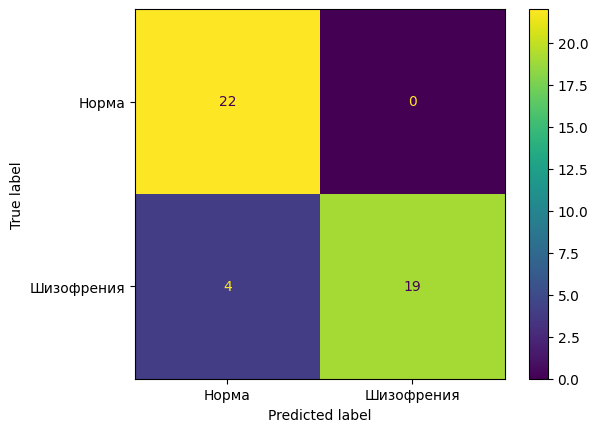

In [ ]:
#построим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

### **2. Теперь используем все 3 класса и проверим, не испортит ли детская речь результаты (а может, наоборот, еще улучшит?)**



### **2.1. Мультикласс без кросс-валидации**

In [ ]:
#стратифицируем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
DF_train, DF_test = train_test_split(DF, test_size = 0.2, stratify = DF['Состояние'])
DF_train.head(5), DF_test.head(5)

(      Состояние                                              Текст
 66        Норма  Мы, нижеподписавшиеся, действуя от имени Герма...
 39   Шизофрения  В сердце радуга... белые тельца волос - это и ...
 54   Шизофрения  С удовольствием расскажу, мы катались на паром...
 241     Ребенок  Меня делают счастливой духи, сладости, фрукты ...
 57   Шизофрения  Как каштан, который вернули на дерево, который...,
     Состояние                                              Текст
 297   Ребенок  Да, меня уже узнают на улице и это очень приятно!
 180     Норма  Была последняя встреча с Президентом, я опять ...
 235   Ребенок  Счастье – это свобода от всего: от уроков, еже...
 215     Норма  И когда она со мной это готовила, это поставил...
 106     Норма  Сейчас можно сказать, что партия создавалась К...)

In [ ]:
#проверим объем и сбалансированность получившихся выборок
len(DF_train), len(DF_test)

(266, 67)

In [ ]:
from collections import Counter
train_counter = Counter(DF_train['Состояние'])
test_counter = Counter(DF_test['Состояние'])

train_counter, test_counter #классы сбалансированы

(Counter({'Норма': 89, 'Шизофрения': 88, 'Ребенок': 89}),
 Counter({'Ребенок': 22, 'Норма': 22, 'Шизофрения': 23}))

In [ ]:
#закодируем зависимую переменную
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(DF_train['Состояние'])
le.classes_
y2_train = le.transform(DF_train['Состояние'])
y2_test = le.transform(DF_test['Состояние'])
y2_train, y2_test

(array([0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1,
        2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1,
        0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0,
        2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1,
        2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2,
        0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2,
        1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2,
        0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2,
        0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2,
        0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2,
        0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1,
        2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0,
        2, 1]),
 array([1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0,
        0, 2, 1, 2, 2,

In [ ]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
tf_idf.fit(DF_train['Текст'])
X2_train = tf_idf.transform(DF_train['Текст'])
X2_test = tf_idf.transform(DF_test['Текст'])

In [ ]:
#для классификации по нескольким классам используем модель MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X2_train, y2_train)

MultinomialNB()

In [ ]:
#применим метод predict на тестовых данных
y2_pred = nb.predict(X2_test)

In [ ]:
#проверим показатели качества работы модели
print(classification_report(y2_test, y2_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Норма       0.51      1.00      0.68        22
     Ребенок       0.83      0.45      0.59        22
  Шизофрения       0.83      0.43      0.57        23

    accuracy                           0.63        67
   macro avg       0.73      0.63      0.61        67
weighted avg       0.73      0.63      0.61        67



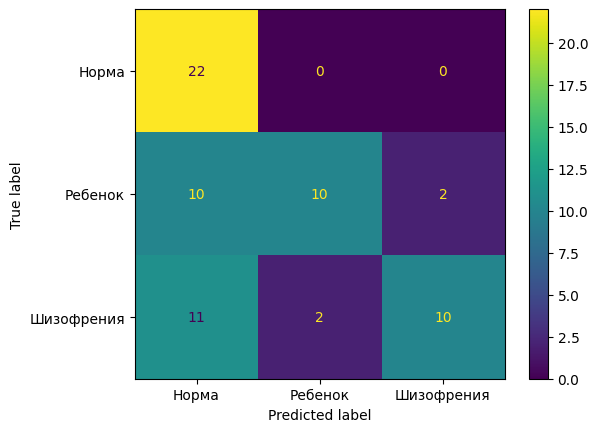

In [ ]:
#построим матрицу ошибок - детская речь подпортила общую картину
cm = confusion_matrix(y2_test, y2_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

### ***2.2. Мультикласс с кросс-валидацией***

In [161]:
X = DF['Текст']
y = DF['Состояние']

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)
DF_train.head(5), DF_test.head(5)

(      Состояние                                              Текст  Объем  \
 182       Норма  Во-первых, демократия. Я иду по Минску – все х...    639   
 211       Норма  У меня был очень страшный период в жизни, когд...    798   
 26   Шизофрения  Интересно все-таки очень, в каких смыслах меня...    468   
 247     Ребенок  Когда люди любят друг друга, они всё время цел...    127   
 189       Норма  Вот это проблема, что очень дорого выборы и во...    789   
 
       Возраст  
 182  Взрослый  
 211  Взрослый  
 26   Взрослый  
 247   Ребенок  
 189  Взрослый  ,
       Состояние                                              Текст  Объем  \
 292     Ребенок  Но эти три недели дома было ужасно: бабушка и ...    643   
 151  Шизофрения  Стол - это обычно...повседневно встречающееся ...    127   
 224     Ребенок  Нет, они ссорились! Только молча.  Мама гремел...    162   
 1    Шизофрения  Величина, оторванная в область дипломатии, даё...    765   
 37   Шизофрения  Надо есть лук: утро

In [163]:
#так как данных у нас очень мало, используем кросс-валидацию KFold
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)


In [164]:
for i, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 

In [191]:
#попробовала несколько классификаторов, наивный байес сработал лучше всего
from sklearn.naive_bayes import MultinomialNB


In [176]:
from sklearn.pipeline import Pipeline
pipes = []
pipes = []

for i, (train_indexes, test_indexes) in enumerate(cv.split(X_train, y_train)):

    print('Fold number: ', i)

    pipe = Pipeline([('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

    current_X_train = X_train.iloc[train_indexes]
    current_y_train = y_train.iloc[train_indexes]
    current_X_test = X_train.iloc[test_indexes]
    current_y_test = y_train.iloc[test_indexes]

    pipe.fit(current_X_train, current_y_train)
    current_preds = pipe.predict(current_X_test)

    print(classification_report(current_y_test, current_preds))

    pipes.append(pipe)


Fold number:  0
              precision    recall  f1-score   support

       Норма       0.80      0.80      0.80        25
     Ребенок       0.71      0.92      0.80        13
  Шизофрения       0.83      0.62      0.71        16

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.77        54
weighted avg       0.79      0.78      0.77        54

Fold number:  1
              precision    recall  f1-score   support

       Норма       0.34      1.00      0.51        14
     Ребенок       1.00      0.22      0.36        23
  Шизофрения       0.71      0.31      0.43        16

    accuracy                           0.45        53
   macro avg       0.69      0.51      0.43        53
weighted avg       0.74      0.45      0.42        53

Fold number:  2
              precision    recall  f1-score   support

       Норма       0.62      1.00      0.77        20
     Ребенок       1.00      0.45      0.62        20
  Шизофрения       0.83    

In [183]:
y_pred_cv = pipes[0].predict(X_test)

In [184]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

       Норма       0.73      0.86      0.79        22
     Ребенок       0.88      0.95      0.91        22
  Шизофрения       0.94      0.70      0.80        23

    accuracy                           0.84        67
   macro avg       0.85      0.84      0.83        67
weighted avg       0.85      0.84      0.83        67



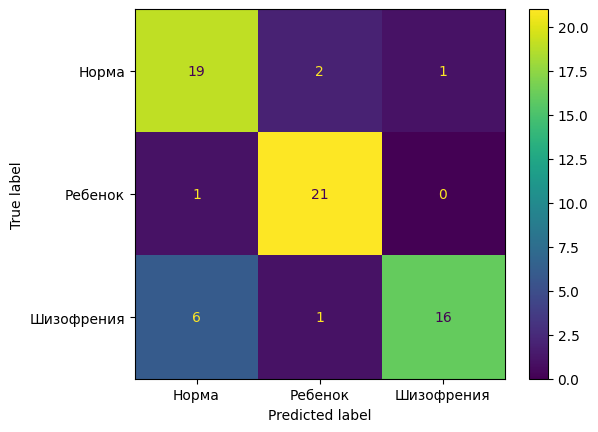

In [189]:
cm = confusion_matrix(y_test, y_pred_cv)
cm_display = ConfusionMatrixDisplay(cm, display_labels=pipe.classes_).plot()

### **3. Попробуем использовать ансамблевый метод для улучшения результата**

In [196]:
#стратифицируем выборку на тренировочную и тестовую (так же, 80% тренировочная и 20% тестовая)
from sklearn.model_selection import train_test_split
DF_train, DF_test = train_test_split(DF, test_size = 0.2, stratify = DF['Состояние'])
DF_train.head(5), DF_test.head(5)

(      Состояние                                              Текст  Объем
 69        Норма  Мне очень приятно слышать все, о чем говорил Д...    514
 88        Норма  Эта выставка — про то, что Балабанов гораздо г...    563
 138  Шизофрения  Здесь сок, а здесь сон, плачу барыш по шахматам.      49
 188       Норма  На первом этапе, по молодости, допустим, в 30-...    540
 330     Ребенок  В Турции, в Египте и в Одессе. Мне больше всег...    531,
       Состояние                                              Текст  Объем
 129  Шизофрения  Научись фехтовать! Мой брат Денис говорил: "Гл...    282
 17   Шизофрения  К мим подругам приходили энерго-вампиры(мне по...    470
 233     Ребенок  Счастье приносят игрушки, подарки, день рожден...    123
 23   Шизофрения  Солнце когда-нибудь погаснет, и об этом нельзя...    635
 77        Норма  Нет, старший прапорщик. Оканчивал «ШМич» — шко...    636)

In [197]:
#закодируем зависимую переменную
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(DF_train['Состояние'])
y_train = le.transform(DF_train['Состояние'])
y_test = le.transform(DF_test['Состояние'])
y_train, y_test

(array([0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1,
        2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0,
        0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1,
        2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0,
        0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0,
        1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0,
        0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2,
        2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0,
        2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1,
        0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
        1, 0]),
 array([2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1,
        1, 2, 0, 2, 2,

In [200]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
tf_idf.fit(DF_train['Текст'])
X_train = tf_idf.transform(DF_train['Текст'])
X_test = tf_idf.transform(DF_test['Текст'])

In [202]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [217]:
estimators = [('grad', GradientBoostingClassifier(random_state=10, n_iter_no_change = 15)),
              ('forest', RandomForestClassifier(random_state=10)),
              ('knc', KNeighborsClassifier(n_neighbors=3))]
final_estimator = LogisticRegression(class_weight='balanced', random_state=10)

In [218]:
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [219]:
stack.fit(X_train, y_train.ravel())

StackingClassifier(estimators=[('grad',
                                GradientBoostingClassifier(n_iter_no_change=15,
                                                           random_state=10)),
                               ('forest',
                                RandomForestClassifier(random_state=10)),
                               ('knc', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      random_state=10))

In [220]:
stack_pred = stack.predict(X_test)

In [221]:
print(classification_report(y_test,stack_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Норма       0.90      0.78      0.84        23
     Ребенок       0.75      0.95      0.84        22
  Шизофрения       0.74      0.64      0.68        22

    accuracy                           0.79        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.80      0.79      0.79        67



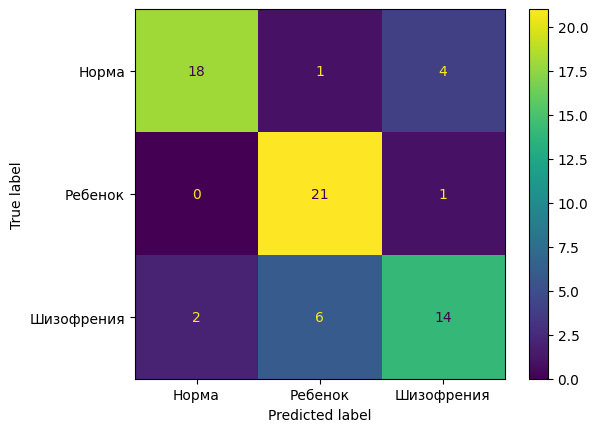

In [222]:
cm = confusion_matrix(y_test, stack_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

### **4. Проанализируем, насколько параметр объема текста мог бы помочь нам в корректировке результатов. Немногословностью будет характеризоваться только детская речь, поэтому мы объединим данные аномальной и нормотипичной речи взрослых.**

In [37]:
#добавим колонку с количеством знаков в датафрейм
DF['Объем'] = DF['Текст'].apply(lambda x: len(x))
DF.head(5)

,Состояние,Текст,Объем
0,Шизофрения,"Родился на улице Герцена, в гастрономе номер д...",647
1,Шизофрения,"Величина, оторванная в область дипломатии, даё...",765
2,Шизофрения,Библиотека двинется в сторону ста двадцати еди...,593
3,Шизофрения,Недавно я встретил старого друга. Но я сижу в ...,766
4,Шизофрения,Для больших - масштабы строительных блоков пер...,760


In [48]:
#объединим взрослую речь
DF.loc[DF['Состояние'] == 'Норма', 'Возраст'] = 'Взрослый'
DF.loc[DF['Состояние'] == 'Шизофрения', 'Возраст'] = 'Взрослый'
DF.loc[DF['Состояние'] == 'Ребенок', 'Возраст'] = 'Ребенок'
from collections import Counter
counter = Counter(DF['Возраст'])
counter


Counter({'Взрослый': 222, 'Ребенок': 111})

In [52]:
#разделим данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
DF_train, DF_test = train_test_split(DF, test_size=0.2,
                                        random_state=42,
                                        stratify = DF['Возраст'])

In [72]:
#Выборки будут не сбалансированы, поправим это при вызове модели
train_counter = Counter(DF_train['Возраст'])
test_counter = Counter(DF_test['Возраст'])

train_counter, test_counter

(Counter({'Взрослый': 177, 'Ребенок': 89}),
 Counter({'Ребенок': 22, 'Взрослый': 45}))

In [73]:
#закодируем зависимую переменную
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(DF_train['Возраст'])
y_train = le.transform(DF_train['Возраст'])
y_test = le.transform(DF_test['Возраст'])
y_train, y_test


(array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0]),
 array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1,

In [74]:
#с независимой переменной ничего делать не нужно, просто задаем ее для тренировочной и
#тестовой выборки
x_train = DF_train['Объем']
x_test = DF_test['Объем']

In [76]:
import numpy as np
x_train_numpy = np.array(x_train)
x_train_reshaped = x_train_numpy.reshape(-1, 1)

In [81]:
#сбалансируем выборку, добавив данные в меньший класс
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

x_train_resampled, y_train_resampled = ros.fit_resample(x_train_reshaped, y_train)

In [82]:
#используем модель логистической регрессии для определения степени зависимости возраста говорящего от объема текста
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, class_weight= 'balanced')

#обучим классификатор на тренировочных данных
clf.fit(x_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

In [84]:
x_test_numpy = np.array(x_test)
x_test_reshaped = x_test_numpy.reshape(-1, 1)

y_pred = clf.predict(x_test_reshaped)

In [85]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    Взрослый       0.92      0.78      0.84        45
     Ребенок       0.66      0.86      0.75        22

    accuracy                           0.81        67
   macro avg       0.79      0.82      0.79        67
weighted avg       0.83      0.81      0.81        67



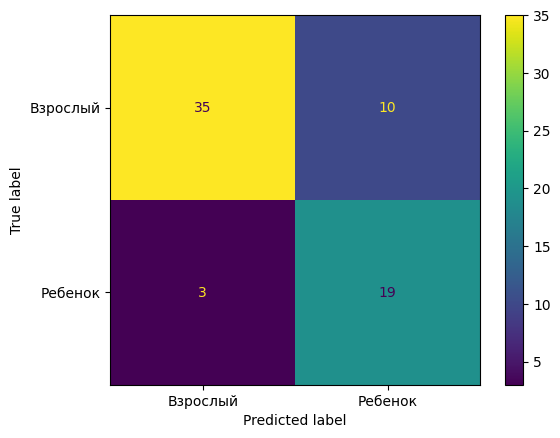

In [86]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

### ***5. Визуализация эмбеддингов слов с Word2Vec***

In [172]:
import multiprocessing
import gensim
from gensim.models import Word2Vec
import gensim.downloader

In [16]:
!pip install pymystem3

In [173]:
#лемматизируем тексты
lemmas = []
from pymystem3 import Mystem
m = Mystem()
for sents in DF['Текст']:
  lemmas.append(''.join(m.lemmatize(sents)))



In [28]:
print(lemmas)

['рождаться на улица герцен, в гастроном номер двадцать два. известный экономист, по призвание свой\xa0— библиотекарь. в народ\xa0— колхозник. в магазин\xa0— продавец. в экономика, так сказать, необходимый. это, так сказать, система… э-э-э… в состав сто двадцать единица. фотографировать мурманский полуостров и получать «тот-ле-фун-кен». и бухгалтер работать по другой линия\xa0— по линия библиотекарь. потому что не воздух быть, академик быть! ну вот можно сфотографировать мурманский полуостров. можно становиться воздушный ас. можно становиться воздушный планета. и быть уверенный, что этот планета принимать по учебник. значит, на польза физика пойти один планета. \n', 'величина, отрывать в область дипломатия, давать свой колебание на весь дипломатия. а илья муромец давать колебание только на семья на свой. спичка в библиотека работать. в кинохроника ходить и зажигать в кинохроника большой лист. в библиотека маленький лист разжигать. огонь… э-э-э… быть вырабатываться гораздо легко, чем уч

In [31]:
import re
tokenized_sentences = [re.findall('\w+', s) for s in lemmas]
tokenized_sentences[10]

['волос',
 'и',
 'вещь',
 'можно',
 'понимать',
 'потому',
 'что',
 'я',
 'желать',
 'обходиться',
 'без',
 'траур',
 'но',
 'у',
 'она',
 'все',
 'еще',
 'быть',
 'проблема',
 'а',
 'не',
 'ваш',
 'крик',
 'душа',
 'она',
 'спрашивать',
 'он',
 'почему',
 'он',
 'это',
 'не',
 'сделать',
 'потому',
 'что',
 'это',
 'долго',
 'для',
 'использование',
 'не',
 'то',
 'что',
 'чистить',
 'микроволновый',
 'печь',
 'она',
 'также',
 'задерживать',
 'для',
 'то',
 'чтобы',
 'в',
 'спорт',
 'быть',
 'я',
 'слабый',
 'что',
 'бы',
 'я',
 'нервничать',
 'я',
 'знать',
 'что',
 'вы',
 'только',
 'кровать',
 'аллегро',
 'быть',
 'на',
 'следующий',
 'неделя',
 'в',
 'конец',
 'конец',
 'я',
 'хотеть',
 'знать',
 'когда',
 'быть',
 'первый',
 'серьезный',
 'удар',
 'мы',
 'должный',
 'знать',
 'что',
 'многий',
 'из',
 'мой',
 'друг',
 'сказать',
 'что',
 'я',
 'он',
 'во',
 'первых',
 'благодаря',
 'их',
 'курение',
 'и',
 'их',
 'ребенок']

In [32]:
cores = multiprocessing.cpu_count()
cores

2

In [174]:
#зададим параметры модели
w2v_model = Word2Vec(min_count=0,
                     window=2,
                     sample=1e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

In [175]:
#построим словарь
w2v_model.build_vocab(tokenized_sentences)
w2v_model.corpus_count

333

In [176]:
#запустим тренировку модели
%%time
w2v_model.train(tokenized_sentences, total_examples=w2v_model.corpus_count, epochs=50)

CPU times: user 1.44 s, sys: 12.4 ms, total: 1.45 s
Wall time: 1.51 s


(227418, 1173900)

In [38]:
from collections import defaultdict, Counter
classes = DF['Состояние'].tolist()
classes[10:15]

['Шизофрения', 'Шизофрения', 'Шизофрения', 'Шизофрения', 'Шизофрения']

In [39]:
class_to_text = defaultdict(list)

for cl, text in zip(classes, lemmas):
    class_to_text[cl].append(text)


In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ru_stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
#построим вложенный словарь слов и частот для каждого класса, убрав при этом стоп-слова
words_per_class = defaultdict(dict)

for k, v in class_to_text.items():
    for text in v:
        c = Counter(text.split())
        for stop_word in ru_stop_words:
            c.pop(stop_word, None)
            words_per_class[k].update(c)

In [43]:
word_counts_per_class = {}

for k, v in words_per_class.items():
    word_counts_per_class[k] = sum(v.values())

In [46]:
import itertools

In [179]:
#отсортируем частотный словарь от большего к меньшему для нахождения самых частотных слов.
#для векторов, слов и классов создадим списки для последующей визуализации
class_names = []
vectors = []
vector_words = []


for classes, words in words_per_class.items():

    sorted_words = sorted(words.items(), key=lambda item: item[1], reverse=True)
    class_vectors = []
    class_words = []


    for word_pair in sorted_words:
        if len(class_vectors) < 70:

            current_word = word_pair[0]

            try:
              current_vec = w2v_model.wv.get_vector(current_word)
              class_vectors.append(current_vec)
              class_words.append(current_word)

            except:
              pass

        else:
            break

    for v, w in zip(class_vectors, class_words):
        vectors.append(v)
        vector_words.append(w)
        class_names.append(classes)

In [164]:
len(vectors) == len(vector_words) == len(class_names)

True

In [165]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.preprocessing import LabelEncoder

In [178]:
#настроим величину точек - чем больше частотность слова, тем толще точка
point_sizes = []

for key, val in zip(class_names, vector_words):
    absolute_val = words_per_class[key][val]
    point_sizes.append(absolute_val/word_counts_per_class[key]*25000)

In [180]:
#из векторов сделаем матрицу, затем закодируем лейблы классов
vector_matrix = np.vstack(vectors)
vector_matrix.shape

(210, 100)

In [168]:
le = LabelEncoder()
labels = le.fit_transform(class_names)

In [169]:
print(list(le.classes_))

['Норма', 'Ребенок', 'Шизофрения']


In [170]:
embedded = TSNE(n_components=2,
                learning_rate='auto',
                init='random',
                perplexity=45).fit_transform(vector_matrix)

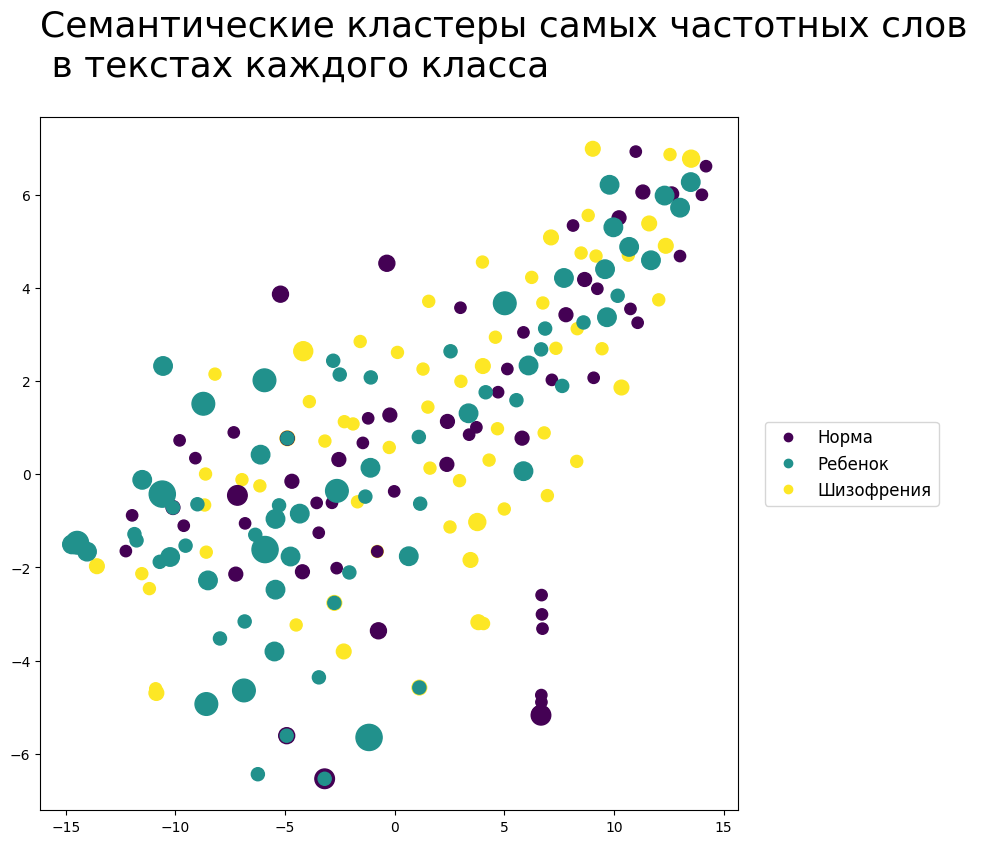

In [181]:
fig, ax = plt.subplots(figsize=(9,9))
scatter = plt.scatter(embedded[:,0], embedded[:,1],
                      c=labels,
                      s=list(map(lambda x: x*5, point_sizes)))
plt.legend(handles=scatter.legend_elements()[0],
           labels=list(le.classes_),
           prop={'size': 12},
           loc='center right',
           bbox_to_anchor=(1.3, 0.5))
plt.title('Семантические кластеры самых частотных слов \n в текстах каждого класса',
          size=26,
          loc='left',
          pad=30)
plt.show()